In [32]:
from newsapi import NewsApiClient



In [33]:
results = api.get_everything(q='TSLA')

In [55]:
newsapi = NewsApiClient(api_key='3435d51b16fe4b2ba56843cb0c75fc4c')

# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                      from_param='2021-05-10',
                                      to='2021-05-12',
                                      language='en',
                                      sort_by='relevancy')

In [28]:
import pandas as pd
from datetime import datetime, timedelta

df = pd.read_csv('../resources/yahoo_dataset/AAPL-news.csv')

dtformat = '%Y-%m-%d %H:%M:%SZ'

def time_travel(kind, quantity):
    """
    :param now: initial date
    :param mins: minutes that we want to decrease from the starting time

    :return back_in_time: updated date
    """
    now = datetime.now().strftime(dtformat)
    now = datetime.strptime(now, dtformat)
    
    if kind == 'day' or kind == 'days':
        cleaned = now - timedelta(days=quantity)
    elif kind == 'minute' or kind == 'minutes':
        cleaned = now - timedelta(minutes=quantity)
    elif kind == 'hour' or kind == 'hours':
        cleaned = now - timedelta(hours=quantity)
    
    return cleaned.strftime(dtformat)

def updateData(text):
    fields = text.split(" ")
    return time_travel(fields[2], int(fields[1]))
    
df['time'] = df['posted'].apply(updateData)

In [36]:
df['title']

time
2021-05-13 20:14:53Z    Apple’s iPhone privacy clampdown arrives after...
2021-05-13 17:56:53Z                Apple Earnings: Five Things To Expect
2021-05-13 18:56:53Z    Apple's M2 SoC Enters Production, Could Ship i...
2021-05-13 16:56:53Z    Apple M2 Chip For Powerful New Macs Enters Pro...
2021-05-13 10:56:53Z     Apple's Latest 'M2' Chips Are in Mass Production
                                              ...                        
2021-05-13 19:56:53Z           How Apple is Going to Spend US$430 Billion
2021-05-13 12:56:53Z    Apple rolls out new privacy feature for iPhone...
2021-05-07 20:56:53Z    Apple AirTags: The highs and lows of these $29...
2021-05-13 19:56:53Z    Intel’s nightmare continues as next-gen Apple ...
2021-05-06 20:56:53Z    Apple's new Siri Remote lacks U1 locator to he...
Name: title, Length: 628, dtype: object

In [37]:
df = df.set_index('time')
df = df[['title']]

In [42]:
df.to_csv('../resources/yahoo_dataset/AAPL-news-cleaned.csv')

### S&P Sector

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.graph_objects as go

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
html = pd.read_html(url, header = 0)
df = html[0]

df = df[['Symbol','Security','GICS Sector']]
df = df.set_index('Symbol')
df

,Security,GICS Sector
Symbol,,
MMM,3M Company,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ABMD,Abiomed,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands Inc,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


In [8]:
# df.to_csv('../resources/dictionaries/S&P-Sectors.csv')

In [9]:
df_read = pd.read_csv('../resources/dictionaries/S&P-Sectors.csv').set_index('Symbol')

In [10]:
df_read

,Security,GICS Sector
Symbol,,
MMM,3M Company,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ABMD,Abiomed,Health Care
ACN,Accenture,Information Technology
...,...,...
YUM,Yum! Brands Inc,Consumer Discretionary
ZBRA,Zebra Technologies,Information Technology
ZBH,Zimmer Biomet,Health Care


[*********************100%***********************]  1 of 1 completed


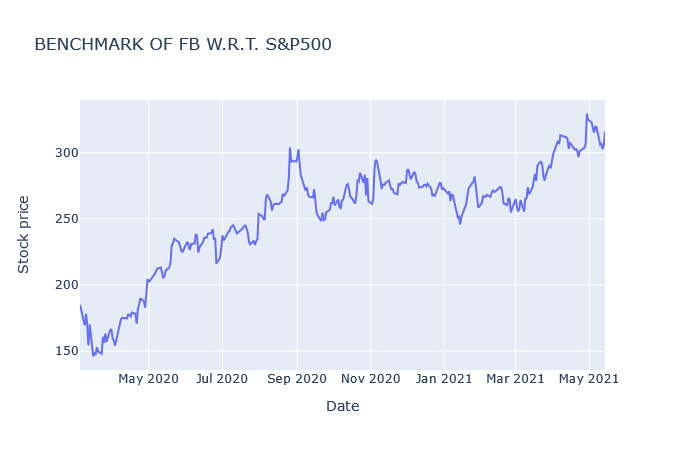

In [45]:
def get_data(ticker,start):
    """
    :param ticker: ticker that we want to track
    :param start: start date of the analysis (1 year ago, by default)
    :return: historical data
    """
    return yf.download(ticker, start=start)

ticker = 'FB'
stock_history  = get_data(ticker,'2020-03-06')
stock_history = stock_history['Adj Close']

fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_history.index, y=stock_history.values, name=ticker))

fig.update_layout(
    title= f"BENCHMARK OF {ticker} W.R.T. S&P500",
    xaxis_title="Date",
    yaxis_title="Stock price"
)

In [11]:
def get_sector(ticker):
    """
    :param ticker: (String) ticker that we want to track
    :return: (String) sector of the company
    :return: (list) companies of the same sector
    """
    
    df = pd.read_csv('../resources/dictionaries/S&P-Sectors.csv').set_index('Symbol')
    
    sector = df.loc[ticker]['GICS Sector']
    similar_tickers = list(df[df['GICS Sector'] == sector].index)
    similar_companies = list(df[df['Security'] == sector].index)
    
    
    return sector, similar_tickers, similar_companies

In [15]:
l = ['3M Company','Abbott Laboratories']
df_read[df_read['Security'] == l[0]]

,Security,GICS Sector
Symbol,,
MMM,3M Company,Industrials


In [32]:
df_read[df_read['Security'] == '3M Company']['GICS Sector'].index[0]

'MMM'